# HANC with a Welfare State

In [22]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize
from scipy.optimize import minimize_scalar
import copy
from copy import deepcopy

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCWelfareModel import HANCWelfareModelClass
from steady_state import obj_ss

from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import func


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Part I: Setting up and testing the model

In [23]:
# If new_output = True, all figures and tables will be exported
# If all = True 2 additional figures will be created which are slow and non-essential
new_output = False
all = True

model = HANCWelfareModelClass(name='baseline')

par = model.par
ss = model.ss
sol = model.sol
path = model.path

In [24]:
ss.r = 0.02*(1-0.1)
ss.wt = 1.00*(1-0.3)
ss.S = 0.0
ss.Chi = 0.1
ss.G = 0.4

model.solve_hh_ss(do_print=True)
model.simulate_hh_ss(do_print=True)

household problem in ss solved in 0.1 secs [334 iterations]
household problem in ss simulated in 0.4 secs [403 iterations]


In [25]:
par.Chi_ = 0.0
par.G_ = 0.0
model.find_ss(do_print=True)

starting at [3.8624]

 message: The solution converged.
 success: True
  status: 1
     fun: [ 6.999e-13  0.000e+00]
       x: [ 3.673e+00  0.000e+00]
    nfev: 9
    fjac: [[-1.000e+00  0.000e+00]
           [ 0.000e+00 -1.000e+00]]
       r: [-8.480e+00 -2.748e+00  9.816e-01]
     qtf: [-6.223e-08  0.000e+00]

steady state found in 1.4 secs
ss.K =  3.389
ss.A_hh =  3.389
ss.L =  0.923
ss.Y =  1.363
ss.r =  0.021
ss.w =  1.034
ss.clearing_A = 7.00e-13
ss.clearing_L = 0.00e+00
ss.clearing_Y = 3.27e-11


In [26]:
model.test_path(in_place=True) 
model.compute_jacs(do_print=True)

shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             6.8e-10
 C_hh             2.0e-11
 ELL_hh           3.1e-11
 L_hh             2.6e-11
 INC_hh           1.2e-11
 U_hh             7.2e-07
blocks.market_clearing
 L                2.6e-11
 I                5.6e-17
 clearing_A       6.8e-10 [target]
 clearing_L       2.6e-11
 clearing_Y       2.0e-11
 clearing_G       0.0e+00 [target]
household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for Chi             in 0.2 secs
curly_Y and curly_D calculated for S               in 0.2 secs
curly_Y and curly_D calculated for r               in 0.2 secs
curly_Y and curly_D calculated 

# Part II Question answers

### A Stationary Equalibrium without gov 

In [27]:
#Dictionaries for storing results 
ss_res = {}
table_res = {}
chi_results = {}


**A.1: Finding SS**

In [28]:
par.G_ = 0.0
par.Chi_ = 0.0
model.find_ss(do_print=False)

In [29]:
ss_res['Model A'] = func.table_ss(model)

**A.2: Ploting - Policy function**

Not exporting


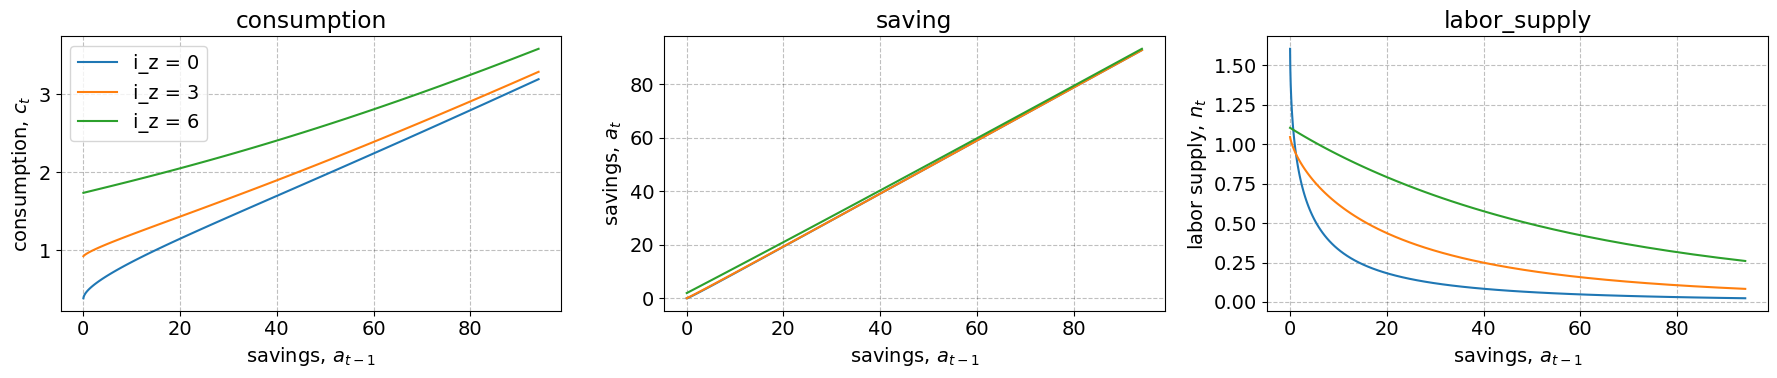

In [30]:
func.plot_policy(model, new_output=new_output)

**A.3: Ploting - Distribution in SS**

Not exporting


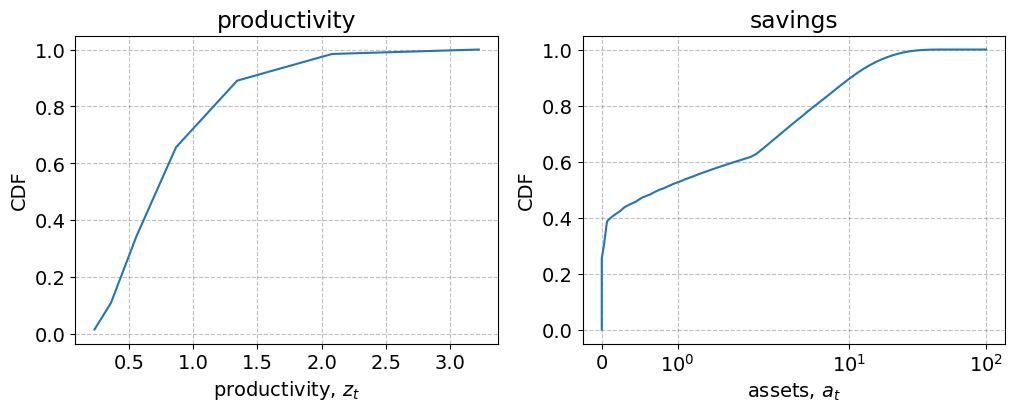

In [31]:
func.plot_cdf(model, new_output=new_output)

**A.4: Ploting - Expected discounted utility**

shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             6.8e-10
 C_hh             2.0e-11
 ELL_hh           3.1e-11
 L_hh             2.6e-11
 INC_hh           1.2e-11
 U_hh             7.2e-07
blocks.market_clearing
 L                2.6e-11
 I                5.6e-17
 clearing_A       6.8e-10 [target]
 clearing_L       2.6e-11
 clearing_Y       2.0e-11
 clearing_G       0.0e+00 [target]
Utility: -100000001.6179
Not exported


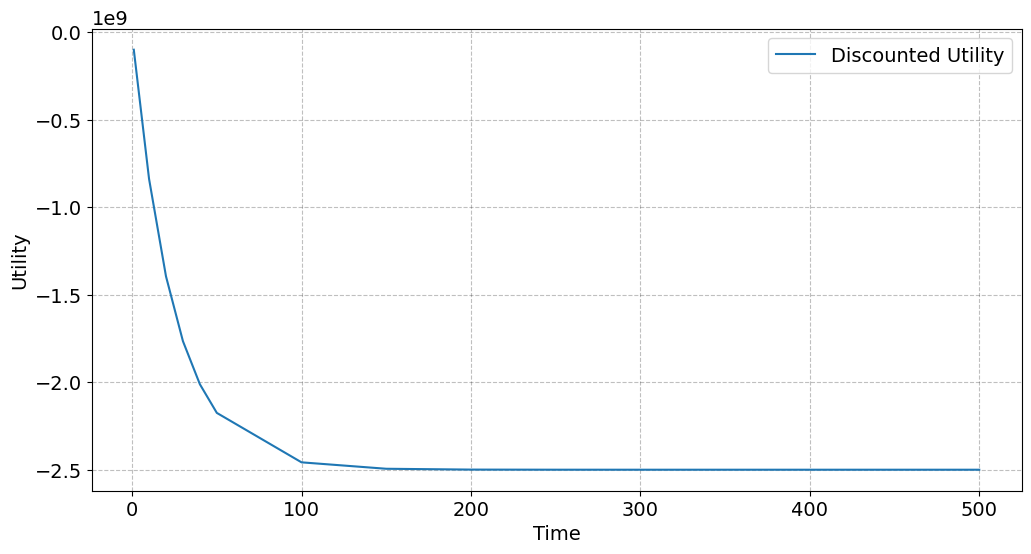

In [32]:
func.plot_utility(model, new_output= new_output)

# B. Optimal welfare policies 1 (no transfers)

In [33]:
result_b = minimize_scalar(func.u_gov, bounds=(0.36, 0.475), method='bounded', args=(model))

func.u_gov(result_b.x, model)


ss_res['Model B'] = func.table_ss(model)

x_ = [result_b.x, 0.0]
table_res['Model B'] = func.table_extra(x_,model)

shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             8.8e-10
 C_hh             2.3e-11
 ELL_hh           9.8e-11
 L_hh             7.9e-11
 INC_hh           4.8e-12
 U_hh             2.1e-10
blocks.market_clearing
 L                7.9e-11
 I                1.1e-16
 clearing_A       5.1e-09 [target]
 clearing_L       7.9e-11
 clearing_Y       2.3e-11
 clearing_G       8.7e-10 [target]
shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi      

In [34]:
if all:
    chi_results['Model B'] = func.calc_chi(0.0, model, lists=True)

shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             8.8e-10
 C_hh             2.3e-11
 ELL_hh           9.8e-11
 L_hh             7.9e-11
 INC_hh           4.8e-12
 U_hh             2.1e-10
blocks.market_clearing
 L                7.9e-11
 I                1.1e-16
 clearing_A       5.1e-09 [target]
 clearing_L       7.9e-11
 clearing_Y       2.3e-11
 clearing_G       8.7e-10 [target]
shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi      

In [59]:
if all:
    print(f'G \/ Gamma at optimal level of government production')
    print(chi_results['Model B']['Y_G_relatio'])

In [60]:
if all:
    func.plot_chi(model, chi_results, new_output, chi0=True)

In [62]:
table_res['Model B'] 

,Value
Variable,
Chi_val,0.000
Gov_opt,0.415
Gamma_Y,1.000
U_opt,-138.968
Y_G_relatio,0.340


# C. Find optimal welfare policies II (with transfers)

**C.1: Optimal level $\chi$ an government production**

In [37]:
x0 =[0.4, -0.2]

result_c = optimize.minimize(func.u_gov_chi, x0, method='Nelder-Mead', args=model)

func.u_gov_chi(result_c.x, model)

ss_res['Model C'] = func.table_ss(model)
table_res['Model C'] = func.table_extra(result_c.x,model)

shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             7.7e-10
 C_hh             1.7e-11
 ELL_hh           6.8e-11
 L_hh             5.5e-11
 INC_hh           1.5e-11
 U_hh             1.4e-10
blocks.market_clearing
 L                5.5e-11
 I                2.2e-16
 clearing_A       7.7e-10 [target]
 clearing_L       5.5e-11
 clearing_Y       1.7e-11
 clearing_G       2.5e-11 [target]
shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi      

**C.2: Plots**

In [39]:
#data 
if all:
    chi_values = [-0.35, -0.2, -0.3, -0.25, -0.2, -0.22, -0.15, -0.1, -0.05, 0.0, 0.05]  # List of chi values to compute
    opt_u_values = []

    # Additional Chi values for plotting 
    for chi in chi_values:
        chi_results[str(chi)] = func.calc_chi(chi, model, lists=True)

    for i in chi_values:
            opt_u_values.append(chi_results[str(i)]['U_opt'])

In [40]:
if all:
    func.plot_chi_u(chi_values, opt_u_values, new_output)

In [61]:
table_res['Model C'] 

,Value
Variable,
Chi_val,-0.218
Gov_opt,0.444
Gamma_Y,1.000
U_opt,-136.889
Y_G_relatio,0.318


Figure wil be added

# D. Increased TFP 

In [41]:
#Copy the steady state values
ini_ = model.ss.__dict__.copy()

model2 = deepcopy(model)
model2.par.G_ = 0.4653
model2.par.Chi_ = -0.2477

model2.par.Gamma_G_ = 1.0
model2.par.Gamma_Y_ = 1.1
model2.find_ss()
model3 = deepcopy(model2)

In [42]:
x0 =[0.4, -0.2]

result_d = optimize.minimize(func.u_gov_chi, x0, method='Nelder-Mead', args=model2)

func.u_gov_chi(result_d.x, model2)

ss_res['Model D'] = func.table_ss(model2)
table_res['Model D'] = func.table_extra(result_d.x,model2)

shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             8.2e-10
 C_hh             1.9e-11
 ELL_hh           6.3e-11
 L_hh             5.1e-11
 INC_hh           1.6e-11
 U_hh             1.3e-10
blocks.market_clearing
 L                5.1e-11
 I                2.2e-16
 clearing_A       8.2e-10 [target]
 clearing_L       5.1e-11
 clearing_Y       1.9e-11
 clearing_G       2.7e-11 [target]
shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi      

In [43]:
table_res['Model D']

,Value
Variable,
Chi_val,-0.248
Gov_opt,0.465
Gamma_Y,1.100
U_opt,-128.840
Y_G_relatio,0.311


# E. Transition Path 

In [44]:
# a. define shock
len = 30

model3 = deepcopy(model2)


dG = np.zeros(par.T)
for t in range(len): 
    dG[t] =  - (model.ss.G - model2.ss.G ) * (t + 1) / len + (model.ss.G - model2.ss.G )


dL_G = np.zeros(par.T)
for t in range(len): 
    dL_G[t] = - (model2.ss.G - model.ss.G) * (t + 1) / len + (model.ss.G - model2.ss.G )


shocks = {'dG':dG, 'dL_G' : dL_G } # note the 'd' for difference (in absolute terms)

model.find_transition_path(shocks=[])
model2.find_transition_path(shocks=[], ini=ini_)
model3.find_transition_path(shocks=shocks, ini=ini_)

S: terminal value is   0.42332758, but ss value is   0.46525600
U_hh: terminal value is  -5.36649141, but ss value is  -5.15360891


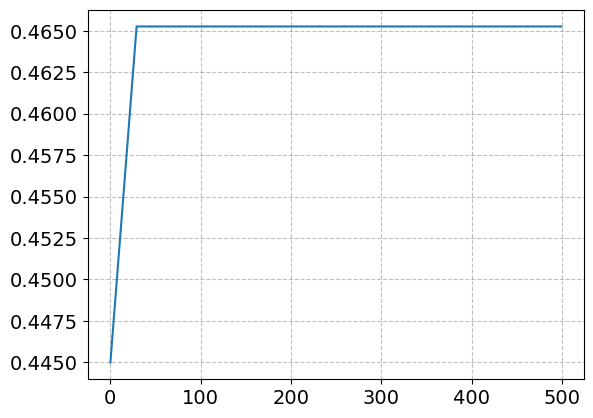

In [45]:
plt.plot(model3.path.G[:])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Private production')

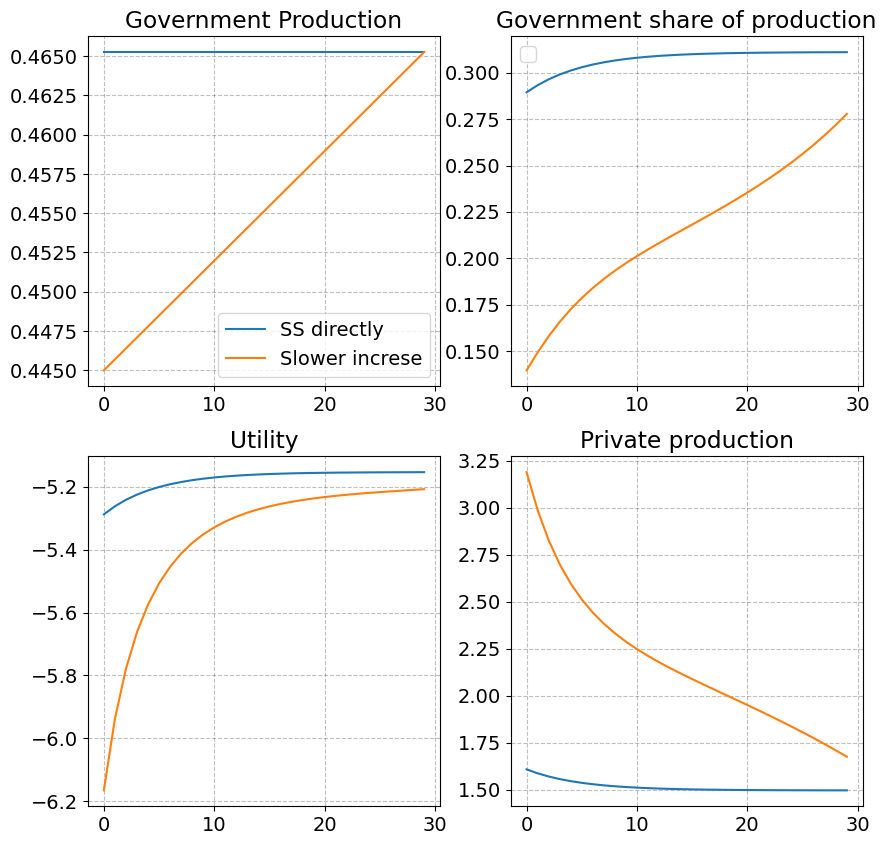

In [55]:
fig = plt.figure(figsize=(10, 10), dpi=100)
len = 30

ax0 = fig.add_subplot(2,2,1)
#ax0.plot(model.path.G[:len], label = 'Model low productivity')
ax0.plot(model2.path.G[:len], label = 'SS directly')
ax0.plot(model3.path.G[:len], label = 'Slower increse')
ax0.set_title('Government Production')
ax0.legend()

ax1 = fig.add_subplot(2,2, 2)
#ax1.plot(model.path.G[:len]/model.path.Y[:len])
ax1.plot(model2.path.G[:len]/model2.path.Y[:len])
ax1.plot(model3.path.G[:len]/model3.path.Y[:len])

ax1.set_title('Government share of production')
ax1.legend()

ax2 = fig.add_subplot(2,2,3)
#ax2.plot(model.path.U_hh[:len])
ax2.plot(model2.path.U_hh[:len])
ax2.plot(model3.path.U_hh[:len])
ax2.set_title('Utility')

ax3 = fig.add_subplot(2,2,4)
#ax3.plot(model.path.Y[:len])
ax3.plot(model2.path.Y[:len])
ax3.plot(model3.path.Y[:len])
ax3.set_title('Private production')

In [57]:
fig.savefig('figs/tranition_path2.png', dpi = 200)

In [48]:
Utility = []

for model in [model, model2, model3]:
    Utility.append(np.sum([par.beta**t * np.sum(model.path.u[t]*model.path.D[t]/np.sum(model.path.D[t])) for t in range(par.T)]))


In [49]:
print(Utility)


[-136.8892846710934, -129.44610982190926, -135.2399645763835]
                Value
Variable             
Chi_val        -0.218
Gov_opt         0.444
Gamma_Y         1.000
U_opt        -136.889
Y_G_relatio     0.318


## Output  

Dataframes

In [50]:
ss_df = pd.concat(ss_res.values(), axis=1, keys=ss_res.keys())
res_df = pd.concat(table_res.values(), axis=1, keys=ss_res.keys())

Exporting to latex

In [51]:
func.table_latex(ss_df, 'table_ss', new_output)
func.table_latex(res_df, 'table_res', new_output)

not exported
                   Model A Model B Model C Model D
                     Value   Value   Value   Value
Variable                                          
K                    3.389   2.897   3.479   3.731
L_Y                  0.923   0.843   0.946   0.882
rK                   0.121   0.126   0.121   0.120
w                    1.034   1.014   1.034   1.187
Y                    1.363   1.221   1.399   1.495
Gamma_Y              1.000   1.000   1.000   1.100
A                    3.389   2.897   3.479   3.731
r                    0.021   0.026   0.021   0.020
tau                  0.000   0.655   0.477   0.482
wt                   1.034   0.350   0.541   0.615
L_G                  0.000   0.415   0.444   0.465
G                    0.000   0.415   0.444   0.465
Chi                  0.000   0.000  -0.218  -0.248
S                    0.000   0.415   0.444   0.465
Gamma_G              1.000   1.000   1.000   1.000
A_hh                 3.389   2.897   3.479   3.731
C_hh              

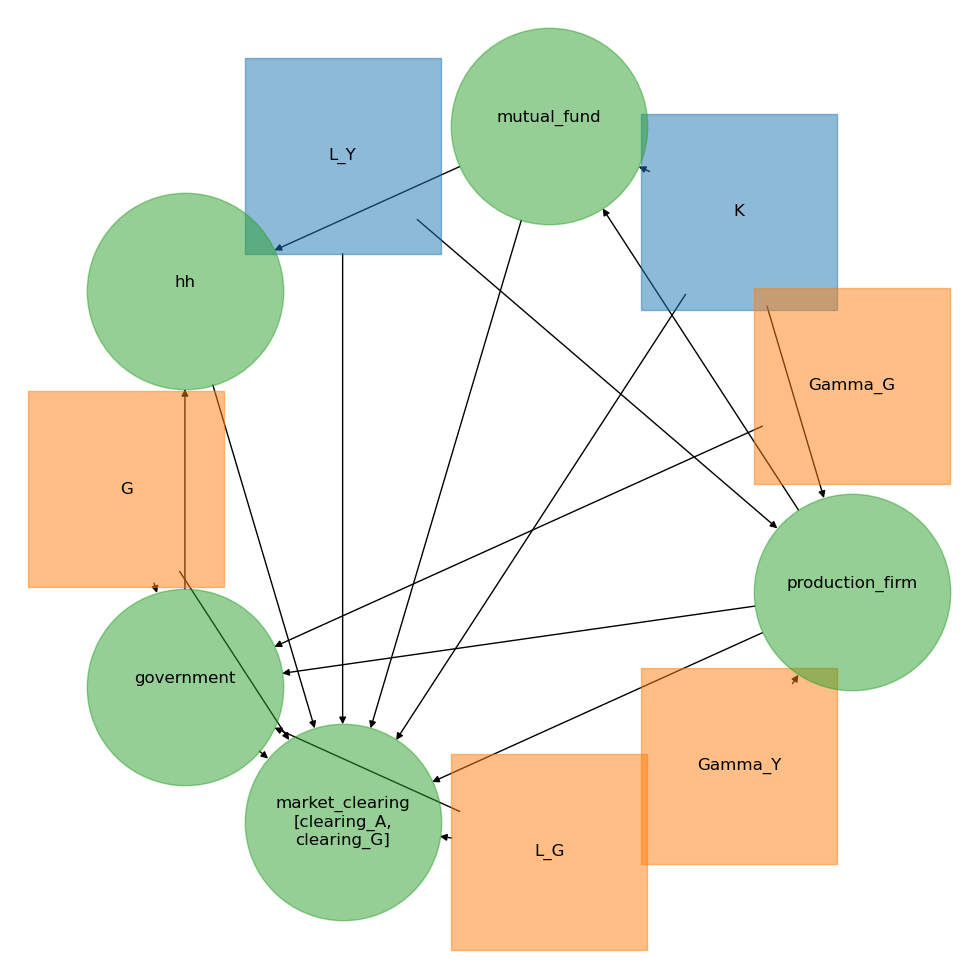

In [52]:
model.draw_DAG()